<center>
    <h1 id='benchmark-analysis' style='color:#7159c1; font-size:350%'>Benchmark Analysis</h1>
    <i style='font-size:125%'>Analysing Recommendation System Algorithms Performances</i>
</center>

> **Topics**

```
- 👨‍🔬 Merging Datasets
- 👨‍🔬 Exploring Performances
- 👨‍🔬 Conclusions
```

In [11]:
# ---- Imports ----
import gc                          # pip install gc
import numpy as np                 # pip install numpy
import pandas as pd                # pip install pandas
import plotly.graph_objects as go  # pip install plotly

# ---- Constants ----
DATASETS_PATH = ('./datasets/benchmarks')
SEED = (20240420) # April 20, 2024 (fourth Bitcoin Halving)

# ---- Settings ----
np.random.seed(SEED)
pd.set_option('display.max_columns', None)

# ---- Functions -----

# \ Description:
#    - returns a list containing two floats, being:
#      - 1) 0 when the difference between the mean and standard deviation is negative,
#    else, the difference itself is returned;
#      - 2) the sum of the mean with the standard deviation.
#
# \ Parameters:
#    - mean: Pandas DataFrame or Pandas Series;
#    - std: Pandas DataFrame or Pandas Series.
#
# \ Return:
#    - List of Floats.
#
calculate_error = lambda mean, std: [(max(0, mean - std), mean + std) for mean, std in zip(mean, std)]

<h1 id='0-merging-datasets' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>👨‍🔬 | Merging Datasets</h1>

Since a different benchmark dataset has been created for each Recommendation System Algorithm and it's better to work with a single one to analyse the performances, the first thing we have to do in this notebook is merge all datasets into one!!

In [2]:
# ---- Reading Datasets ----
bayesian_mean_df = pd.read_csv(f'{DATASETS_PATH}/demographic-filtering-bayesian-mean.csv')
popularity_df = pd.read_csv(f'{DATASETS_PATH}/demographic-filtering-popularity.csv')
plots_df = pd.read_csv(f'{DATASETS_PATH}/content-based-filtering-plots.csv')
metadatas_df = pd.read_csv(f'{DATASETS_PATH}/content-based-filtering-metadas.csv')
user_based_df = pd.read_csv(f'{DATASETS_PATH}/collaborative-filtering-user-based.csv')
item_based_df = pd.read_csv(f'{DATASETS_PATH}/collaborative-filtering-item-based.csv')
hybrid_df = pd.read_csv(f'{DATASETS_PATH}/hybrid-filtering.csv')

In [3]:
# ---- Merging Datasets ----
#
# - axis: 0 concats the datasets by rows (top-bottom) and 1 concats by columns (side-by-side)
#
full_benchmark_df = pd.concat(
    [
        bayesian_mean_df
        , popularity_df
        , plots_df
        , metadatas_df
        , user_based_df
        , item_based_df
        , hybrid_df
    ]
    , ignore_index=True
    , axis=0
)

full_benchmark_df['algorithm'] = pd.Categorical(full_benchmark_df['algorithm'])

In [4]:
# ---- Exporting Dataset ----
full_benchmark_df.to_csv(f'{DATASETS_PATH}/full-benchmark.csv', index=False)

In [5]:
# ---- Deleting Objects ----
#
#  - 'del' keyword deletes the object into RAM memory;
#  - 'gc.collect()' function frees the freed and unused RAM memory previously occupied by the objects;
# Moreover. the number of non-deleted objects is returned after running the function.
#
del bayesian_mean_df
del popularity_df
del plots_df
del metadatas_df
del user_based_df
del item_based_df
del hybrid_df
del full_benchmark_df

gc.collect()

0

<h1 id='1-exploring-performances' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>👨‍🔬 | Exploring Performances</h1>

```
- Reading Dataset and Calculating Statistics:  Execution Time, Avg RAM Usage, Avg CPU Usage;
- Arithmetic Mean and Standard Deviation Analysis: Execution Time, Avg RAM Usage, Avg CPU Usage;
- Iteration Analysis: All Variables;
- Correlation Analysis: All Variables.
```

---

**- Reading Dataset and Calculating Statistics:  Execution Time, Avg RAM Usage, Avg CPU Usage**

In [6]:
# ---- Reading Dataset, Grouping and Calculating Statistics ----
benchmark_df = pd.read_csv(f'{DATASETS_PATH}/full-benchmark.csv')
benchmark_df['algorithm'] = pd.Categorical(benchmark_df['algorithm'])

# ---- Grouping ----
#
# - Pandas GroupBy: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
#
grouped_benchmark_df = benchmark_df[
    ['algorithm', 'execution_time', 'avg_ram_usage', 'avg_cpu_usage']
]                                          \
  .groupby(by=['algorithm'], sort=False)   \
  .agg(['mean', 'std'])


# ---- Updating Index ----
algorithms_list = [
    'DF - Bayesian Mean', 'DF - Popularity', 'CBF - Plots'
    , 'CBF - Metadatas', 'CF - User-Based', 'CF - Item-Based'
    , 'Hybrid Filtering'
]

grouped_benchmark_df.index = algorithms_list
grouped_benchmark_df.index.name = 'Algorithm'
grouped_benchmark_df

execution_time            avg_ram_usage            \
                             mean        std          mean       std   
Algorithm                                                              
DF - Bayesian Mean       0.109680   0.003762      0.766327  0.000081   
DF - Popularity          0.109506   0.003037      0.769477  0.000000   
CBF - Plots            288.566181  23.104007      3.811871  0.241169   
CBF - Metadatas          7.557567   1.865608     19.097836  2.251480   
CF - User-Based        101.324690   2.318002      1.488503  0.022910   
CF - Item-Based        587.795372  17.926036      2.219660  0.307524   
Hybrid Filtering       161.763756   3.133079     34.229826  3.336140   

                   avg_cpu_usage            
                            mean       std  
Algorithm                                   
DF - Bayesian Mean      0.356250  0.751047  
DF - Popularity         0.711250  0.918227  
CBF - Plots            12.384713  0.051517  
CBF - Metadatas        11.871647  0.387459  
CF - User-Based        12.355134  0.065017  
CF - Item-Based        12.451096  0.029478  
Hybrid Filtering       12.434723  0.086644

---

**- Arithmetic Mean and Standard Deviation Analysis: Execution Time, Avg RAM Usage, Avg CPU Usage**

In [7]:
# ---- Creating Traces: Execution Time ----
grouped_execution_time_avg = grouped_benchmark_df['execution_time']['mean']
grouped_execution_time_std = grouped_benchmark_df['execution_time']['std']
grouped_execution_time_errors = calculate_error(grouped_execution_time_avg, grouped_execution_time_std)
grouped_execution_time_traces = [
    go.Bar(
        name=algorithm
        , x=[grouped_benchmark_df.loc[algorithm, ('execution_time', 'mean')]]
        , y=[algorithm]
        , error_x=dict(
            type='data'
            , symmetric=False
            , array=[grouped_execution_time_errors[index][1] for index in range(len(grouped_execution_time_avg))]
            , arrayminus=[grouped_execution_time_avg[index] for index in range(len(grouped_execution_time_avg))]
        )
        , orientation='h'
        , visible=True
    ) for algorithm in grouped_benchmark_df.index
]

# ---- Creating Traces: CPU Usage ----
grouped_cpu_usage_avg = grouped_benchmark_df['avg_cpu_usage']['mean']
grouped_cpu_usage_std = grouped_benchmark_df['avg_cpu_usage']['std']
grouped_cpu_usage_errors = calculate_error(grouped_cpu_usage_avg, grouped_cpu_usage_std)
grouped_cpu_usage_traces = [
    go.Bar(
        name=algorithm
        , x=[grouped_benchmark_df.loc[algorithm, ('avg_cpu_usage', 'mean')]]
        , y=[algorithm]
        , error_x=dict(
            type='data'
            , symmetric=False
            , array=[grouped_cpu_usage_errors[index][1] for index in range(len(grouped_cpu_usage_avg))]
            , arrayminus=[grouped_cpu_usage_avg[index] for index in range(len(grouped_cpu_usage_avg))]
        )
        , orientation='h'
        , visible=False
    ) for algorithm in grouped_benchmark_df.index
]

# ---- Creating Traces: RAM Usage ----
grouped_ram_usage_avg = grouped_benchmark_df['avg_ram_usage']['mean']
grouped_ram_usage_std = grouped_benchmark_df['avg_ram_usage']['std']
grouped_ram_usage_errors = calculate_error(grouped_ram_usage_avg, grouped_ram_usage_std)
grouped_ram_usage_traces = [
    go.Bar(
        name=algorithm
        , x=[grouped_benchmark_df.loc[algorithm, ('avg_ram_usage', 'mean')]]
        , y=[algorithm]
        , error_x=dict(
            type='data'
            , symmetric=False
            , array=[grouped_ram_usage_errors[index][1] for index in range(len(grouped_ram_usage_avg))]
            , arrayminus=[grouped_ram_usage_avg[index] for index in range(len(grouped_ram_usage_avg))]
        )
        , orientation='h'
        , visible=False
    ) for algorithm in grouped_benchmark_df.index
]

# ---- Merging All Traces ----
grouped_all_traces = grouped_execution_time_traces + grouped_cpu_usage_traces + grouped_ram_usage_traces

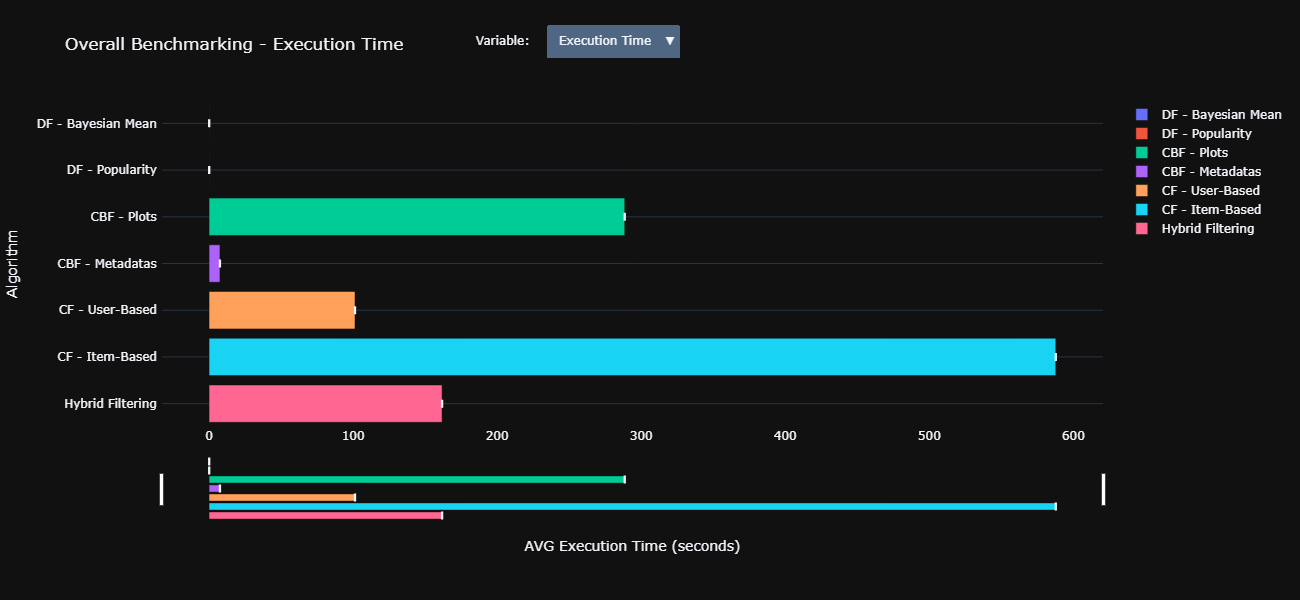

In [41]:
# ---- Figure ----
fig = go.Figure(data=grouped_all_traces)

fig.update_layout(
    title_text='Overall Benchmarking - Execution Time'
    , barmode='group'               # 'group': bars side-by-side; 'stack': bars stacked
    , template='plotly_dark'        # ["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"]
    , legend=dict(orientation='v')  # 'h': horizontal; 'v': vertical
    , xaxis=dict(rangeslider=dict(visible=True), type='linear')
    , width=1250
    , height=600
    , autosize=True
)

fig.update_layout(
    updatemenus=[
        dict(
            active=0
            , x=0.55
            , y=1.23
            , buttons=list([
                dict(
                    args=[
                        { 'visible': [True] * len(grouped_execution_time_traces)
                             + [False] * len(grouped_cpu_usage_traces)
                             + [False] * len(grouped_ram_usage_traces) }
                        , { 'title': 'Overall Benchmarking - Execution Time' }
                        , { 'xaxis.title.text': 'AVG Execution Time (seconds)' }
                    ]
                    , label='Execution Time'
                    , method='update'
                )
                , dict(
                    args=[
                        { 'visible': [False] * len(grouped_execution_time_traces)
                             + [True] * len(grouped_cpu_usage_traces)
                             + [False] * len(grouped_ram_usage_traces) }
                        , { 'title': 'Overall Benchmarking - AVG CPU Usage (%)' }
                        , { 'xaxis.title.text': 'AVG CPU Usage' }
                    ]
                    , label='CPU Usage'
                    , method='update'
                )
                , dict(
                    args=[
                        { 'visible': [False] * len(grouped_execution_time_traces)
                             + [False] * len(grouped_cpu_usage_traces)
                             + [True] * len(grouped_ram_usage_traces) }
                        , { 'title': 'Overall Benchmarking - AVG RAM Usage (%)' }
                        , { 'xaxis.title.text': 'AVG RAM Usage' }
                    ]
                    , label='RAM Usage'
                    , method='update'
                )
            ])
        )
    ]
)

fig.update_layout(annotations=[dict(text='Variable:', x=0.33, xref='paper', y=1.21, yref='paper', showarrow=False)])
fig.update_yaxes(title='Algorithm', type='category', categoryarray=grouped_benchmark_df.index.to_list()[::-1], ticksuffix='\t', showgrid=True)
fig.update_xaxes(title='AVG Execution Time (seconds)')

fig.show()

---

**- Iteration Analysis: All Variables**

In [58]:
# ---- Creating Traces ----
execution_time_line_trace = [
    go.Scatter(
        name=algorithm
        , x=benchmark_df.iteration.loc[benchmark_df.algorithm == algorithm]
        , y=benchmark_df.execution_time.loc[benchmark_df.algorithm == algorithm]
        , mode='lines'
    ) for algorithm in benchmark_df.algorithm.unique().to_list()
]

avg_cpu_usage_line_trace = [
    go.Scatter(
        name=algorithm
        , x=benchmark_df.iteration.loc[benchmark_df.algorithm == algorithm]
        , y=benchmark_df.avg_cpu_usage.loc[benchmark_df.algorithm == algorithm]
        , mode='lines'
    ) for algorithm in benchmark_df.algorithm.unique().to_list()
]

# ---- Merging All Traces ----
all_line_traces = execution_time_line_trace + avg_cpu_usage_line_trace

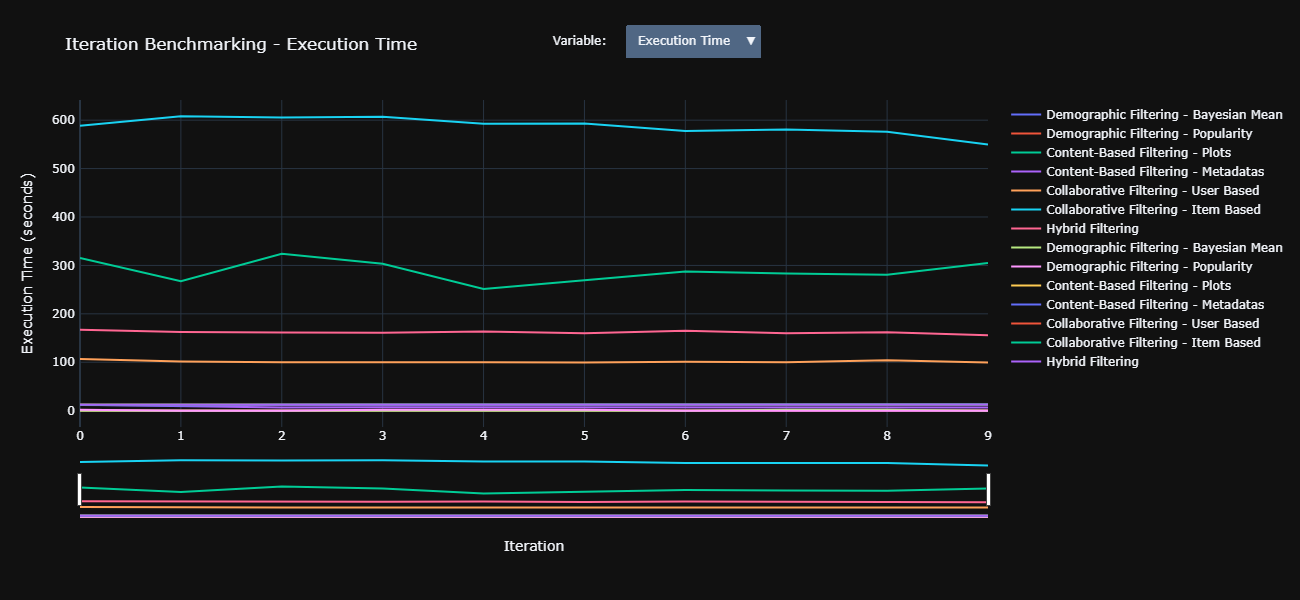

In [59]:
# ---- Figure ----
fig = go.Figure(data=all_line_traces)

fig.update_layout(
    title_text='Iteration Benchmarking - Execution Time'
    , template='plotly_dark'
    , legend=dict(orientation='v')
    , xaxis=dict(rangeslider=dict(visible=True), type='linear')
    , width=1250
    , height=600
    , autosize=True
)

fig.update_layout(
    updatemenus=[
        dict(
            active=0
            , x=0.75
            , y=1.23
            , buttons=list([
                dict(
                    args=[
                        { 'visible': [True] * len(execution_time_line_trace)
                            + [False] * len(avg_cpu_usage_line_trace) }
                        , { 'title': 'Iteration Benchmarking - Execution Time' }
                        , { 'yaxis.title.text': 'Execution Time (seconds)' }
                    ]
                    , label='Execution Time'
                    , method='update'
                )
                , dict(
                    args=[
                        { 'visible': [False] * len(execution_time_line_trace)
                            + [True] * len(avg_cpu_usage_line_trace) }
                        , { 'title': 'Iteration Benchmarking - AVG CPU Usage' }
                        , { 'yaxis.title.text': 'AVG CPU Usage (%)' }
                    ]
                    , label='AVG Cpu Usage'
                    , method='update'
                )
            ])
        )
    ]
)

fig.update_layout(annotations=[dict(text='Variable:', x=0.55, xref='paper', y=1.21, yref='paper', showarrow=False)])
fig.update_yaxes(title='Execution Time (seconds)', ticksuffix='\t')
fig.update_xaxes(title='Iteration')

fig.show()

<h1 id='2-conclusions' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>👨‍🔬 | Conclusions</h1>

---

<h1 id='reach-me' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>📫 | Reach Me</h1>

> **Email** - [csfelix08@gmail.com](mailto:csfelix08@gmail.com?)

> **Linkedin** - [linkedin.com/in/csfelix/](https://www.linkedin.com/in/csfelix/)

> **GitHub:** - [CSFelix](https://github.com/CSFelix)

> **Kaggle** - [DSFelix](https://www.kaggle.com/dsfelix)

> **Portfolio** - [CSFelix.io](https://csfelix.github.io/).